# Parameter estimation for DES model

## Peter Kennedy, 2092220, Cardiff University, MAT021, 14 Dec 2020

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import datetime

## Analysis of arrivalScheduled.csv data

In [9]:
arrSched = pd.read_csv('arrivalScheduled.csv')
arrSched = arrSched.rename(columns={"Number of cars": "Cars"})

arrSched.head()

,Date,Day,Cars
0,01/01/19,Tuesday,4
1,02/01/19,Wednesday,3
2,03/01/19,Thursday,4
3,04/01/19,Friday,2
4,05/01/19,Saturday,4


(array([ 93.,   0.,   0.,   0.,   0., 186.,   0.,   0.,   0.,  86.]),
 array([2. , 2.2, 2.4, 2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. ]),
 <a list of 10 Patch objects>)

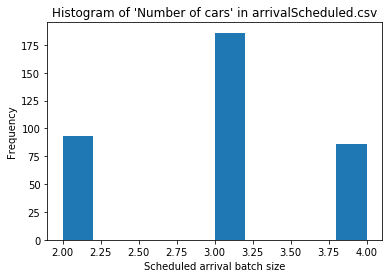

In [50]:
plt.xlabel('Scheduled arrival batch size')
plt.ylabel('Frequency')
plt.title("Histogram of 'Number of cars' in arrivalScheduled.csv")
plt.hist(arrSched.Cars)

In [4]:
# Average (mean) of batch size of scheduled arrivals per day
arrSched.Cars.mean()

2.9808219178082194

In [17]:
# Standard deviation of batch size of scheduled arrivals per day
arrSched.Cars.std()

0.7009917492277086

## Analysis of arrivalUnscheduled.csv data

In [12]:
arrUnsched = pd.read_csv('arrivalUnscheduled.csv')

arrUnsched.head()

,UnscheduledArrivals
0,01/01/2019 00:00
1,02/01/2019 16:00
2,04/01/2019 22:00
3,06/01/2019 20:00
4,08/01/2019 18:00


In [13]:
#Calculation of individual inter arrival times for unscheduled arrivals (in days)

delta_bucket = []

for unsched_date in range(len(arrUnsched) - 1):
    date_time_str_this = arrUnsched.iloc[unsched_date][0]
    date_time_obj_this = datetime.datetime.strptime(date_time_str_this, '%d/%m/%Y %H:%M')
    date_time_str_next = arrUnsched.iloc[unsched_date + 1][0]
    date_time_obj_next = datetime.datetime.strptime(date_time_str_next, '%d/%m/%Y %H:%M')
    delta = date_time_obj_next.timestamp() - date_time_obj_this.timestamp()
    delta_bucket.append(delta/(60*60*24))
    

In [140]:
np_delta_bucket = np.array(delta_bucket)
np_delta_bucket

array([1.66666667, 2.25      , 1.91666667, 1.91666667, 2.04166667,
       2.875     , 1.20833333, 1.66666667, 1.875     , 1.25      ,
       2.29166667, 1.375     , 1.83333333, 1.58333333, 1.66666667,
       1.41666667, 1.70833333, 2.33333333, 2.5       , 1.83333333,
       2.125     , 2.04166667, 2.41666667, 1.79166667, 1.70833333,
       1.625     , 1.66666667, 1.79166667, 1.95833333, 1.95833333,
       2.33333333, 1.70833333, 2.41666667, 2.08333333, 1.83333333,
       2.41666667, 2.08333333, 1.75      , 2.29166667, 1.79166667,
       1.79166667, 2.29166667, 1.70833333, 2.25      , 1.83333333,
       1.95833333, 2.16666667, 1.95833333, 1.75      , 2.20833333,
       2.        , 2.625     , 2.08333333, 2.625     , 2.        ,
       2.20833333, 2.41666667, 2.08333333, 2.08333333, 1.79166667,
       1.625     , 2.        , 1.70833333, 2.20833333, 1.70833333,
       2.04166667, 2.5       , 2.16666667, 1.625     , 1.625     ,
       2.20833333, 1.95833333, 2.16666667, 1.375     , 1.54166

(array([ 2.,  5., 18., 39., 44., 25., 31., 15.,  2.,  2.]),
 array([1.20833333, 1.375     , 1.54166667, 1.70833333, 1.875     ,
        2.04166667, 2.20833333, 2.375     , 2.54166667, 2.70833333,
        2.875     ]),
 <a list of 10 Patch objects>)

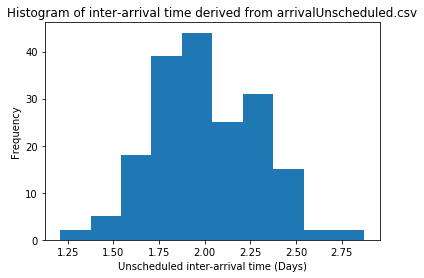

In [47]:
plt.xlabel('Unscheduled inter-arrival time (Days)')
plt.ylabel('Frequency')
plt.title("Histogram of inter-arrival time derived from arrivalUnscheduled.csv")
plt.hist(np_delta_bucket, bins=10)

In [141]:
# Average (mean) inter-arrival time of unscheduled arrivals (in days)
np_delta_bucket.mean()

1.994307832422586

In [142]:
np_delta_bucket.min()

1.2083333333333333

In [138]:
# Standard deviation of inter-arrival time of unscheduled arrivals (in days)
np_delta_bucket.std()

0.28791143409948605

## Analysis of serviceScheduled.csv data

In [36]:
servSched = pd.read_csv('serviceScheduled.csv')
np_servSched = np.array(servSched)
servSched.head()

,timeinhours
0,2.031513
1,1.984567
2,1.937508
3,1.501078
4,1.728006


(array([102., 102., 102.,  89., 100.,  97., 117.,  90., 105.,  96.]),
 array([1.50107804, 1.60093953, 1.70080102, 1.80066251, 1.900524  ,
        2.0003855 , 2.10024699, 2.20010848, 2.29996997, 2.39983146,
        2.49969295]),
 <a list of 10 Patch objects>)

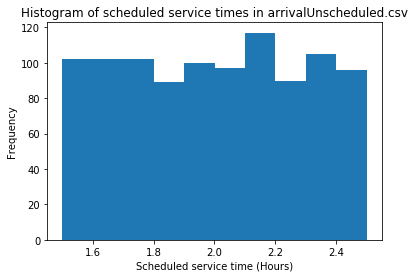

In [42]:
plt.xlabel('Scheduled service time (Hours)')
plt.ylabel('Frequency')
plt.title("Histogram of scheduled service times in arrivalUnscheduled.csv")
plt.hist(np_servSched, bins=10)

In [30]:
# Average (mean) time spent repairing scheduled cars (in days)
servSched.mean()/24

timeinhours    0.083295
dtype: float64

In [31]:
# Minimum time spent repairing scheduled cars (in days)
servSched.min()/24

timeinhours    0.062545
dtype: float64

In [181]:
# Maximum time spent repairing scheduled cars (in days)
servSched.max()/24

timeinhours    0.104154
dtype: float64

## Analysis of serviceUnscheduled.csv data

In [37]:
servUnsched = pd.read_csv('serviceUnscheduled.csv')
np_servUnsched = np.array(servUnsched)
servUnsched.head()

,timeinhours
0,0.858453
1,8.519445
2,0.581225
3,7.671357
4,0.847853


(array([293., 209., 140., 100.,  72.,  61.,  31.,  26.,  22.,  11.,  17.,
          6.,   5.,   1.,   4.,   1.,   0.,   0.,   0.,   1.]),
 array([4.61999800e-03, 8.07727190e-01, 1.61083438e+00, 2.41394157e+00,
        3.21704877e+00, 4.02015596e+00, 4.82326315e+00, 5.62637034e+00,
        6.42947753e+00, 7.23258473e+00, 8.03569192e+00, 8.83879911e+00,
        9.64190630e+00, 1.04450135e+01, 1.12481207e+01, 1.20512279e+01,
        1.28543351e+01, 1.36574423e+01, 1.44605495e+01, 1.52636566e+01,
        1.60667638e+01]),
 <a list of 20 Patch objects>)

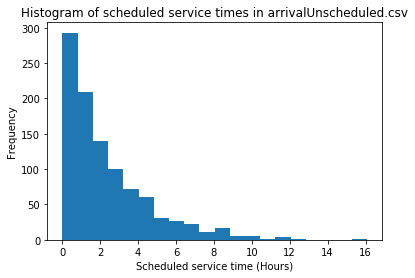

In [39]:
plt.xlabel('Scheduled service time (Hours)')
plt.ylabel('Frequency')
plt.title("Histogram of scheduled service times in arrivalUnscheduled.csv")
plt.hist(np_servUnsched, bins=20)

In [10]:
# Average (mean) time spent repairing unscheduled cars (in days)
servUnsched.mean()/24

timeinhours    0.097373
dtype: float64

In [16]:
# Minimum time spent repairing unscheduled cars (in days)
servUnsched.min()/24

timeinhours    0.000192
dtype: float64

In [144]:
# Maximum time spent repairing unscheduled cars (in days)
servUnsched.max()/24

timeinhours    0.669448
dtype: float64

## Warm Up Time

In [195]:
queueTime = pd.read_csv('queueTime.csv')

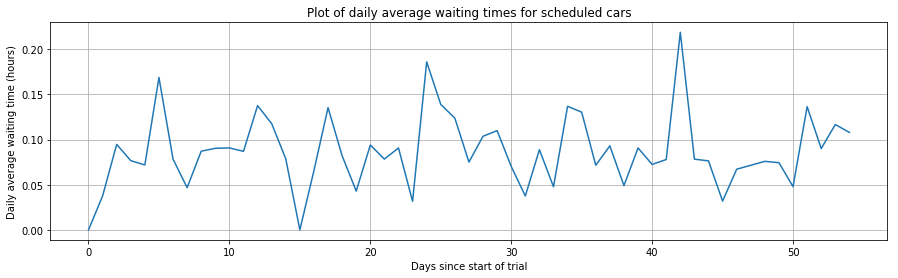

In [196]:
plt.figure(figsize=[15,4])
plt.grid()
plt.xlabel('Days since start of trial')
plt.ylabel('Daily average waiting time (hours)')
plt.title('Plot of daily average waiting times for scheduled cars')
plt.plot(queueTime)

## Analysis of mechlog.csv data

In [220]:
mechLog = pd.read_csv('mechlog.csv')
mechLog.head()

,time_in,time_out,label,wait_time,time_with_mech,other
0,1.00000,1.06498,1,0.00000,0.06498,0
1,1.06498,1.15098,1,0.06498,0.08600,0
2,1.15098,1.24559,1,0.15098,0.09461,0
3,1.98464,2.23396,2,0.00000,0.24932,0
4,2.23396,2.31835,1,0.23396,0.08439,0


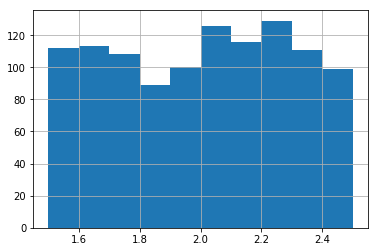

In [221]:
(mechLog[mechLog['label'] == 1]['time_with_mech']*24).hist()

In [222]:
# Average (mean) time that scheduled vehicles were worked on by the mechanic (in hours)
sum(mechLog[mechLog['label'] == 1]['time_with_mech'])/len(mechLog[mechLog['label'] == 1])*24

2.003893816863101

In [223]:
# Minimum time that scheduled vehicles were worked on by the mechanic (in hours)
mechLog[mechLog['label'] == 1]['time_with_mech'].min()*24

1.50048

In [224]:
# Maximum time that scheduled vehicles were worked on by the mechanic (in hours)
mechLog[mechLog['label'] == 1]['time_with_mech'].max()*24

2.50008

## Analysis of schedtime.csv data

In [230]:
schedTime = pd.read_csv('schedtime.csv')
schedTime.head()

,Time
0,0.09010
1,0.16642
2,0.24145
3,0.06373
4,0.13512


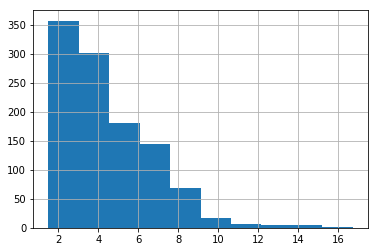

In [231]:
(schedTime['Time']*24).hist()

In [232]:
# Average (mean) time that scheduled vehicles spend in the garage (in hours)
(sum(schedTime['Time'])/len(schedTime))*24

4.419906801843316

In [233]:
# Minimum time that scheduled vehicles spend in the garage (in hours)
(schedTime['Time'].min())*24

1.50096

In [234]:
# Maximum time that scheduled vehicles spend in the garage (in hours)
(schedTime['Time'].max())*24

16.7388

## Mechanic Utilisation

In [235]:
mechUtil = pd.read_csv('mechUtil.csv')
mechUtil.head()

,mechUtil
0,24.144999
1,17.093344
2,26.371030
3,36.430669
4,16.878879


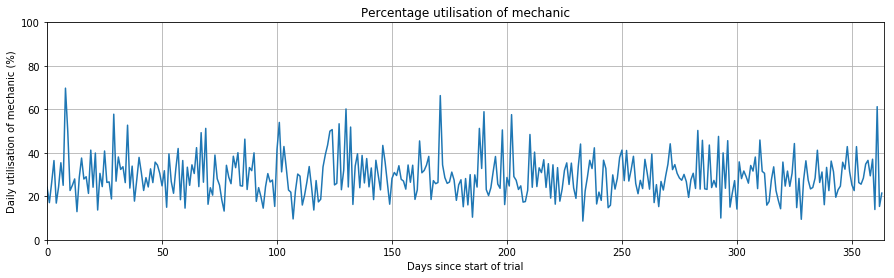

In [236]:
plt.figure(figsize=[15,4])
plt.grid()
plt.xlim(0,364)
plt.ylim(0,100)
plt.xlabel('Days since start of trial')
plt.ylabel('Daily utilisation of mechanic (%)')
plt.title('Percentage utilisation of mechanic')
plt.plot(mechUtil)

In [237]:
mechUtil = pd.read_csv('mechUtil2.csv')
mechUtil.head()

,mechUtil
0,29.951062
1,16.629996
2,36.864619
3,44.837747
4,20.774005


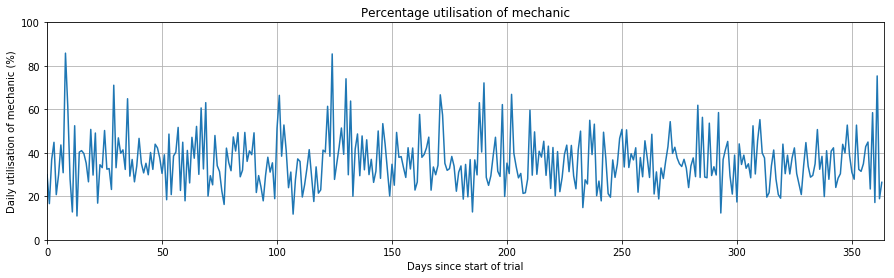

In [238]:
plt.figure(figsize=[15,4])
plt.grid()
plt.xlim(0,364)
plt.ylim(0,100)
plt.xlabel('Days since start of trial')
plt.ylabel('Daily utilisation of mechanic (%)')
plt.title('Percentage utilisation of mechanic')
plt.plot(mechUtil)

In [247]:
mechUtil = pd.read_csv('mechUtil3.csv')
mechUtil.head()

,mechUtil
0,33.051035
1,40.400600
2,33.800927
3,42.553840
4,25.066724


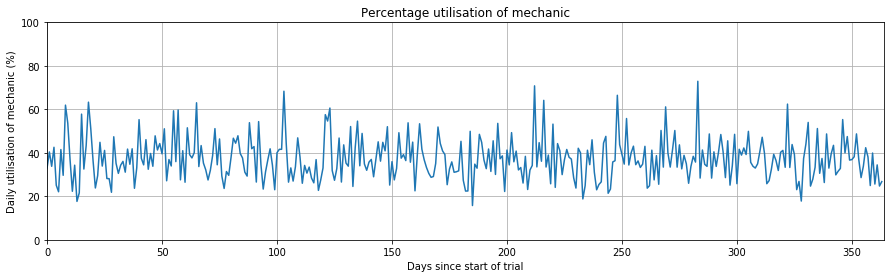

In [248]:
plt.figure(figsize=[15,4])
plt.grid()
plt.xlim(0,364)
plt.ylim(0,100)
plt.xlabel('Days since start of trial')
plt.ylabel('Daily utilisation of mechanic (%)')
plt.title('Percentage utilisation of mechanic')
plt.plot(mechUtil)